In [1]:
%matplotlib inline

import numpy as np
import math
import cv2
from matplotlib import pyplot as plt

# Задание 1
1. Самостоятельно выбранное изображение перевести в формат grayscale. Выполнить контрастирование этого изображения так, что:
    • умакс - умин =50, где умакс и умин – соответственно наибольшее и наименьшее значение интенсивности полученного изображения.
    • Интенсивности пикселей исходного изображения преобразовывались пропорционально.

In [2]:
belyash = cv2.imread('/home/qwe/Desktop/анализ изображений/playing_belyash.jpg')

In [3]:
def print_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

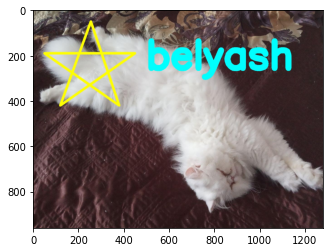

In [4]:
print_img(belyash)

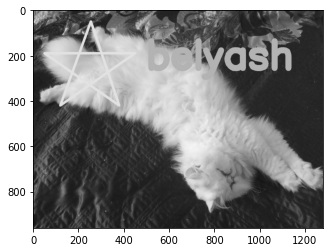

In [63]:
belyash_grey1 = cv2.imread('/home/qwe/Desktop/анализ изображений/playing_belyash.jpg',cv2.IMREAD_GRAYSCALE)
print_img(belyash_grey1)

In [64]:
def getmaxmin(a):
    x_min = a[0][0];
    x_max = a[0][0]
    for k in a:
        x_min = min(x_min,min(k))
        x_max = max(x_max,max(k))
    return x_min,x_max

In [65]:
x_min,x_max = getmaxmin(belyash_grey)
print(belyash_grey)
print("x_min,x_max =")
print(x_min,x_max)

[[ 99 108 113 ...  43  41  37]
 [124 128 126 ...  44  43  40]
 [128 129 126 ...  46  47  44]
 ...
 [ 45  50  55 ...  35  32  28]
 [ 49  52  55 ...  37  33  28]
 [ 50  52  54 ...  33  29  24]]
x_min,x_max =
8 245


Для контрастирования производится линейное преобразование $$y = x \cdot a + b$$ , то есть $$ y_{min} = a \cdot x_{min} + b, y_{max} = a \cdot x_{max} + b $$. Также известны соотношения $$ y_{max} - y_{min} = 50 $$  и b = 0, так как интенсивность пикселей исходного изображений преобразуется пропоционально. Из первый трех равенств получаем,что $$a = \frac{50}{x_{max} - x_{min}} $$

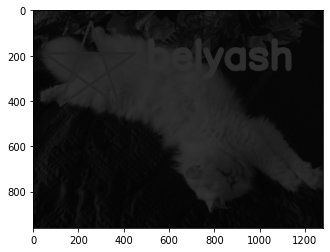

1
51


In [66]:
#  Ручное контрастирование
belyash_grey_contrast = (belyash_grey).copy()
for i in range(0,len(belyash_grey_contrast)):
    for j in range(0,len(belyash_grey_contrast[i])):
        belyash_grey_contrast[i][j] = (int(belyash_grey_contrast[i][j]) *  50) // (x_max - x_min)
print_img(belyash_grey_contrast)
y_min,y_max = getmaxmin(belyash_grey_contrast)
print(y_min)
print(y_max)

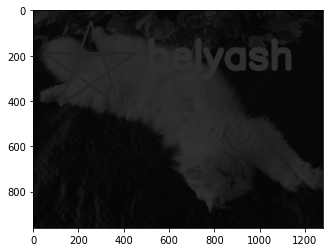

In [67]:
# Автоматическое контрастирование
b = (belyash_grey).copy()
b = cv2.multiply(float(50.0/(x_max - x_min)),b)
print_img(b)

# Задание 2
Выполнить обратное преобразование.

In [68]:
#обратное ручное преобразование
belyash_new_gray = (belyash_grey_contrast).copy()
for i in range(0,len(belyash_new_gray)):
    for j in range(0,len(belyash_new_gray[i])):
        belyash_new_gray[i][j] = (int(belyash_new_gray[i][j]) *  (x_max - x_min)) // (50)
print(belyash_new_gray)
y_min,y_max = getmaxmin(belyash_new_gray)
print(y_min,y_max)

[[ 94 104 109 ...  42  37  33]
 [123 127 123 ...  42  42  37]
 [127 127 123 ...  42  42  42]
 ...
 [ 42  47  52 ...  33  28  23]
 [ 47  47  52 ...  33  28  23]
 [ 47  47  52 ...  28  28  23]]
4 241


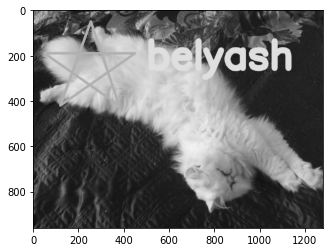

In [69]:
# Автоматическое контрастирование
b = (belyash_grey_contrast).copy()
b = cv2.multiply(float((x_max - x_min)/50),b)
print_img(b)

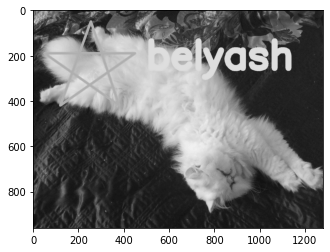

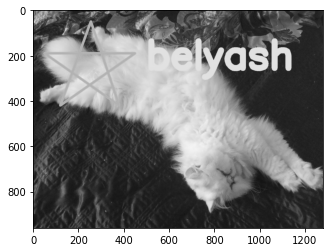

In [70]:
print_img(belyash_new_gray)
print_img(belyash_grey)

# Задание 3
Выполнить контрастирование цветного изображения.

In [71]:
# Ручное цветное контрастирование
new_belyash  = belyash.copy()
for i in range(0,3):
    belyash_channel = new_belyash[:,:,i]
      #print(belyash_channel)
    x_min,x_max = getmaxmin(belyash_channel)
    print("x = ")
    print(x_min,x_max)
    for i in range(0,len(belyash_channel)):
        for j in range(0,len(belyash_channel[i])):
            belyash_channel[i][j] = (int(belyash_channel[i][j]) *  50) // (x_max - x_min)
    y_min,y_max = getmaxmin(belyash_channel)
    print("y = ")
    print(y_min,y_max)

x = 
0 255
y = 
0 50
x = 
6 255
y = 
1 51
x = 
0 255
y = 
0 50


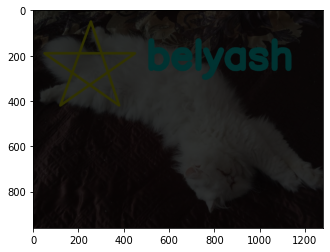

In [72]:
print_img(new_belyash)


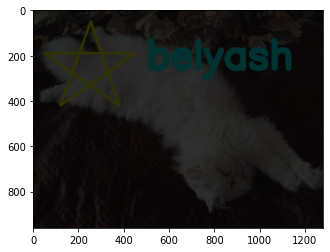

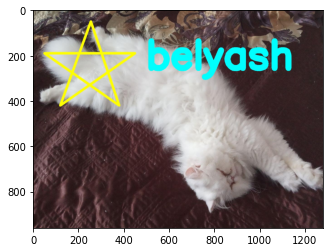

In [73]:
# Автоматическое цветное контрастирование
b = belyash.copy()
for i in range(0,3):
    bb = b[:,:,i]
    x_min,x_max = getmaxmin(bb)
    bb = cv2.multiply(float(50.0/(x_max - x_min)),bb)
    b[:,:,i] = bb
print_img(b)
#cv2.imwrite('/home/qwe/Desktop/анализ изображений/dark_belyash.jpg',b)
print_img(belyash)

# Задание 4
Подобрать различные (минимум три) значения параметра k для соляризации исходного изображения. Выбрать значение k, которое преобразует картинку к лучшему на ваш взгляд виду.

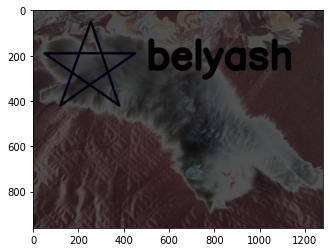

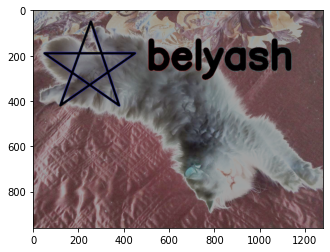

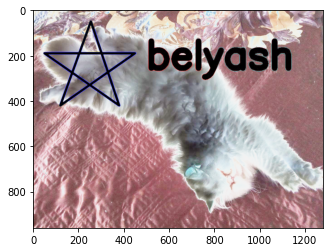

In [74]:
solar_belyash = belyash.copy()
k_vars = [0.005,0.01,0.015]
for k in k_vars:
    my_belyash = solar_belyash.copy()
    for i in range(0,3):
        belyash_channel = my_belyash[:,:,i]
          #print(belyash_channel)
        x_min,x_max = getmaxmin(belyash_channel)
      #  print(belyash_channel*k)
        belyash_channel = k*belyash_channel*(x_max - belyash_channel)
        my_belyash[:,:,i] = belyash_channel
    print_img(my_belyash)

# Задание 5
На выбранном вами изображении с текстом подобрать ядро преобразования, такое что после размытия видно, что текст есть, но прочитать его уже невозможно.

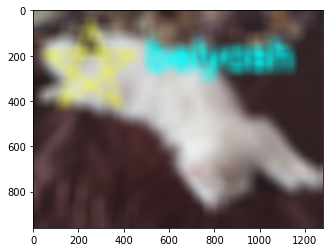

In [75]:
blurry_belyash = belyash.copy()
mykernel = np.ones((60,60),np.float32)/3600
output = cv2.filter2D(blurry_belyash, -1, mykernel)
print_img(output)

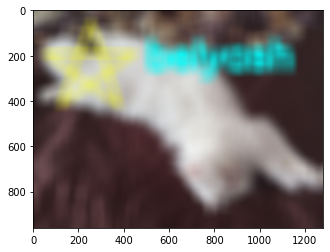

In [76]:
ksize = (60, 60)
  
image = cv2.blur(belyash, ksize) 
print_img(image)

# Задание 6
Применить к изображению двухстороннюю фильтрацию.

фильтр для сглаживания изображения, который уменьшает уровень шума,
сохраняя при этом края. 
Недостаток: работа фильтра требует большоеколичество времени.

cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])

src – source 8-bit or floating-point, 1-channel or 3-channel image.
d – diameter of each pixel neighborhood that is used during filtering. Если <0, то находится из
sigmaSpace - сильно влияет на время работы !!!
sigmaColor – сигма фильтр в цветовом пространстве. Увеличение значения параметра
приводит к увеличению области допустимых цветов пикселей и к увеличению размеров
появляющейся области одного тона.
sigmaSpace – сигма фильтр в координатном пространстве.
Значение параметра характеризует влияние пикселей друг на друга в зависимости от
близости их цвета. Увеличение значения параметра влечет увеличение влияния.
borderType – border mode используется для экстраполяции пикселей вне изображения.

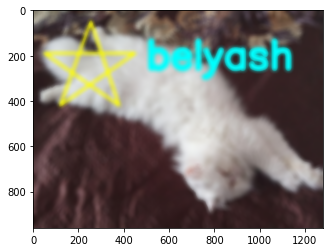

In [77]:
blur = cv2.bilateralFilter(belyash, 30, 500, 250)
print_img(blur)

# Задание 7 
Применить фильтры собеля, Лапласса, алгоритм Канни для выделения границ фигур на grayscale изображении. 

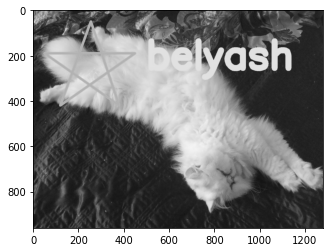

In [78]:
print_img(belyash_grey)

Оператор Собеля - оператор, вычисляющий приближённое значение градиента яркости в каждой точке
изображения. Результат: двумерный вектор, содержащий производные от яркости
изображения по горизонтали и вертикали
Так находим направление наибольшего увеличения яркости и величину её изменения в
этом направлении. Результат показывает:
• насколько «резко» или «плавно» меняется яркость изображения в каждой точке,
• вероятность нахождения точки на грани, а также ориентацию границы.
В каждой точке градиентный вектор ориентирован в направлении наибольшего
увеличения яркости, а его длина соответствует величине изменения яркости. Это
означает, что результатом оператора Собеля в точке, лежащей в области постоянной
яркости, будет нулевой вектор, а в точке, лежащей на границе областей различной
яркости, – вектор, пересекающий границу в направлении увеличения яркости.

Переход Black-to-White обеспечивает положительные константы (направление изменения). Переход White-to-Black обеспечивает отрицательные константы.Если использовать np.uint8, то все отрицательные константы станут нулями,
и граница «исчезнет». Для определения границ следует использовать cv2.CV_16S, cv2.CV_64F, брать абсолютное значение и после конвертировать в cv2.CV_8U

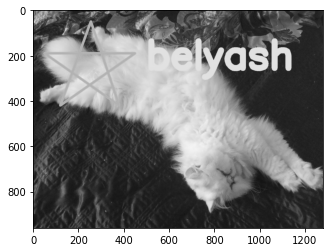

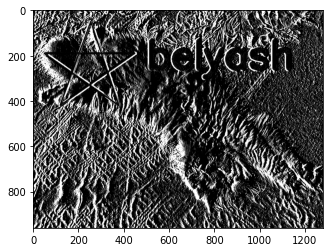

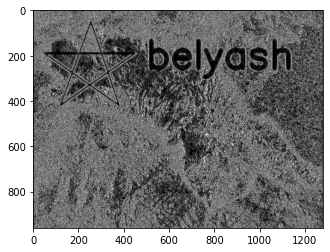

In [79]:
sobelx8u = cv2.Sobel(belyash_grey,cv2.CV_8U,1,0,ksize=5)
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(belyash_grey,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
print_img(belyash_grey)
print_img(sobelx8u)
print_img(sobel_8u)

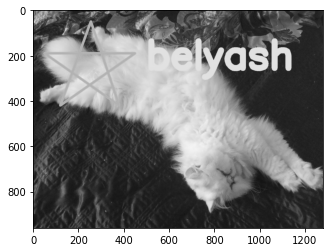

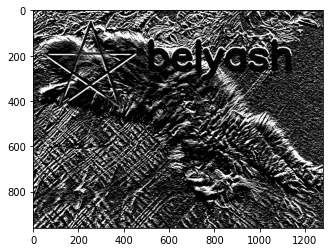

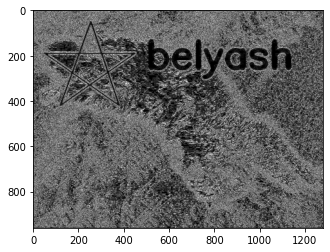

In [80]:
sobelx8u = cv2.Sobel(belyash_grey,cv2.CV_8U,0,1,ksize=5)
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(belyash_grey,cv2.CV_64F,0,1,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
print_img(belyash_grey)
print_img(sobelx8u)
print_img(sobel_8u)

Лаплас - Метод усиления края по Лапласу рассматривает целый ряд различных ядер свертки. В результате обработки области с постоянной или линейно возрастающей интенсивностью становятся черными, а области быстро изменяющихся значений интенсивности ярко высвечиваются.

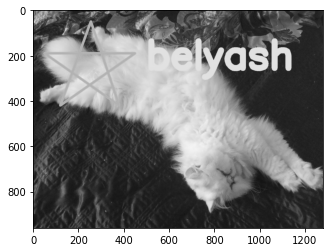

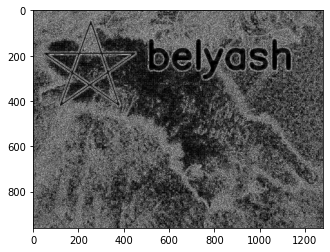

In [81]:
laplacian = cv2.Laplacian(belyash_grey, cv2.CV_64F,ksize=5)
abs_laplacian = np.absolute(laplacian)
laplacian_8u = np.uint8(abs_laplacian)
print_img(belyash_grey)
print_img(laplacian_8u)

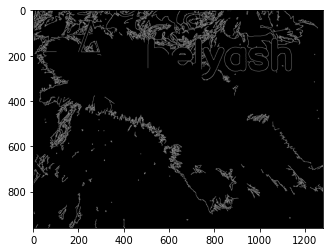

In [82]:
# Метод Канни
canny = cv2.Canny(belyash_grey, 50, 245)
print_img(canny)